In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [2]:
data = pd.read_csv(r"D:\bigdata_itwill\semi_project\data\mbti_1.csv")
df = data.copy()
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## 데이터 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


#### 데이터에 null값 확인

In [4]:
df.isnull().any()

type     False
posts    False
dtype: bool

#### type의 종류

In [5]:
np.unique(np.array(df['type']))

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

#### 타입별 게시글 수

In [6]:
post_type = df.groupby(['type']).count()
post_type

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


####  mbit 타입별 게시글 수 막대차트

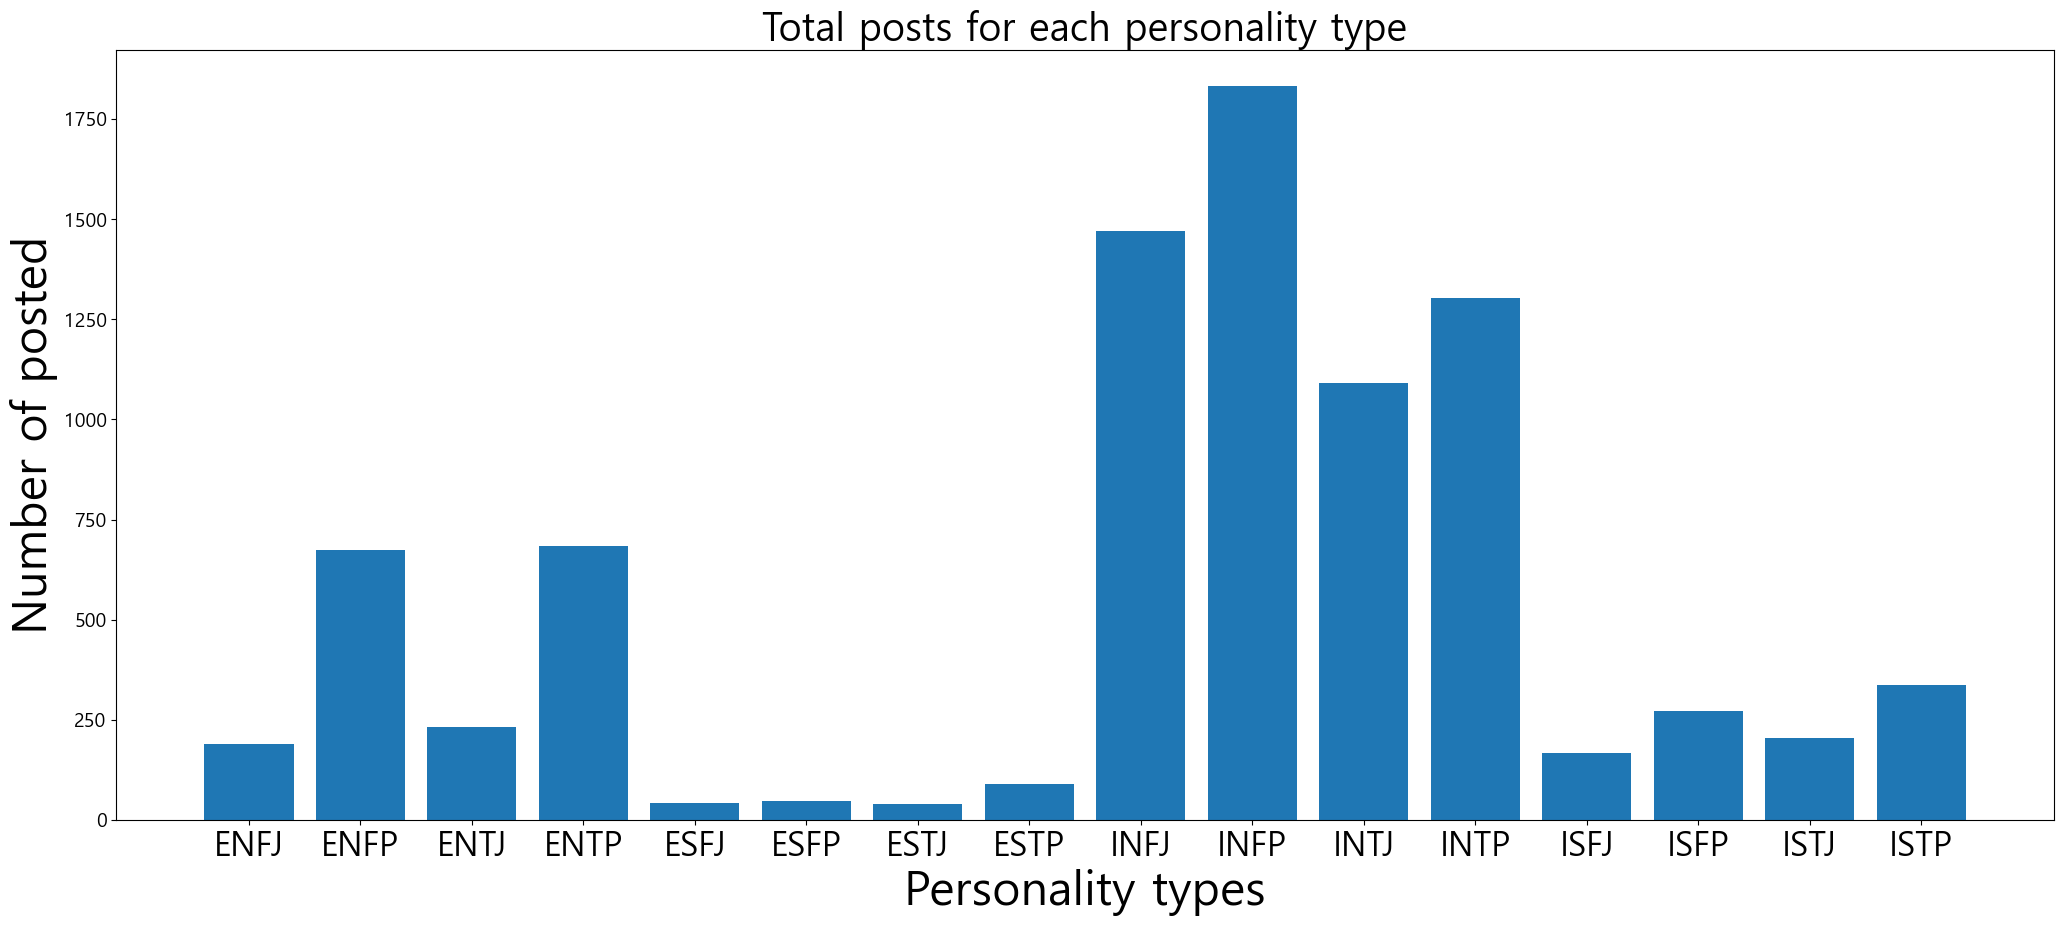

In [7]:
import matplotlib.pyplot as plt
# 차트에서 한글 지원 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(25, 10))
plt.bar(post_type.index, height=post_type['posts'])
plt.xlabel('Personality types', size=34)
plt.ylabel('Number of posted', size=34)
plt.title('Total posts for each personality type', size=28)
plt.xticks(fontsize=24) 
plt.yticks(fontsize=14)  
plt.show()

#### mbti 타입별 게시글 수 파이 차트

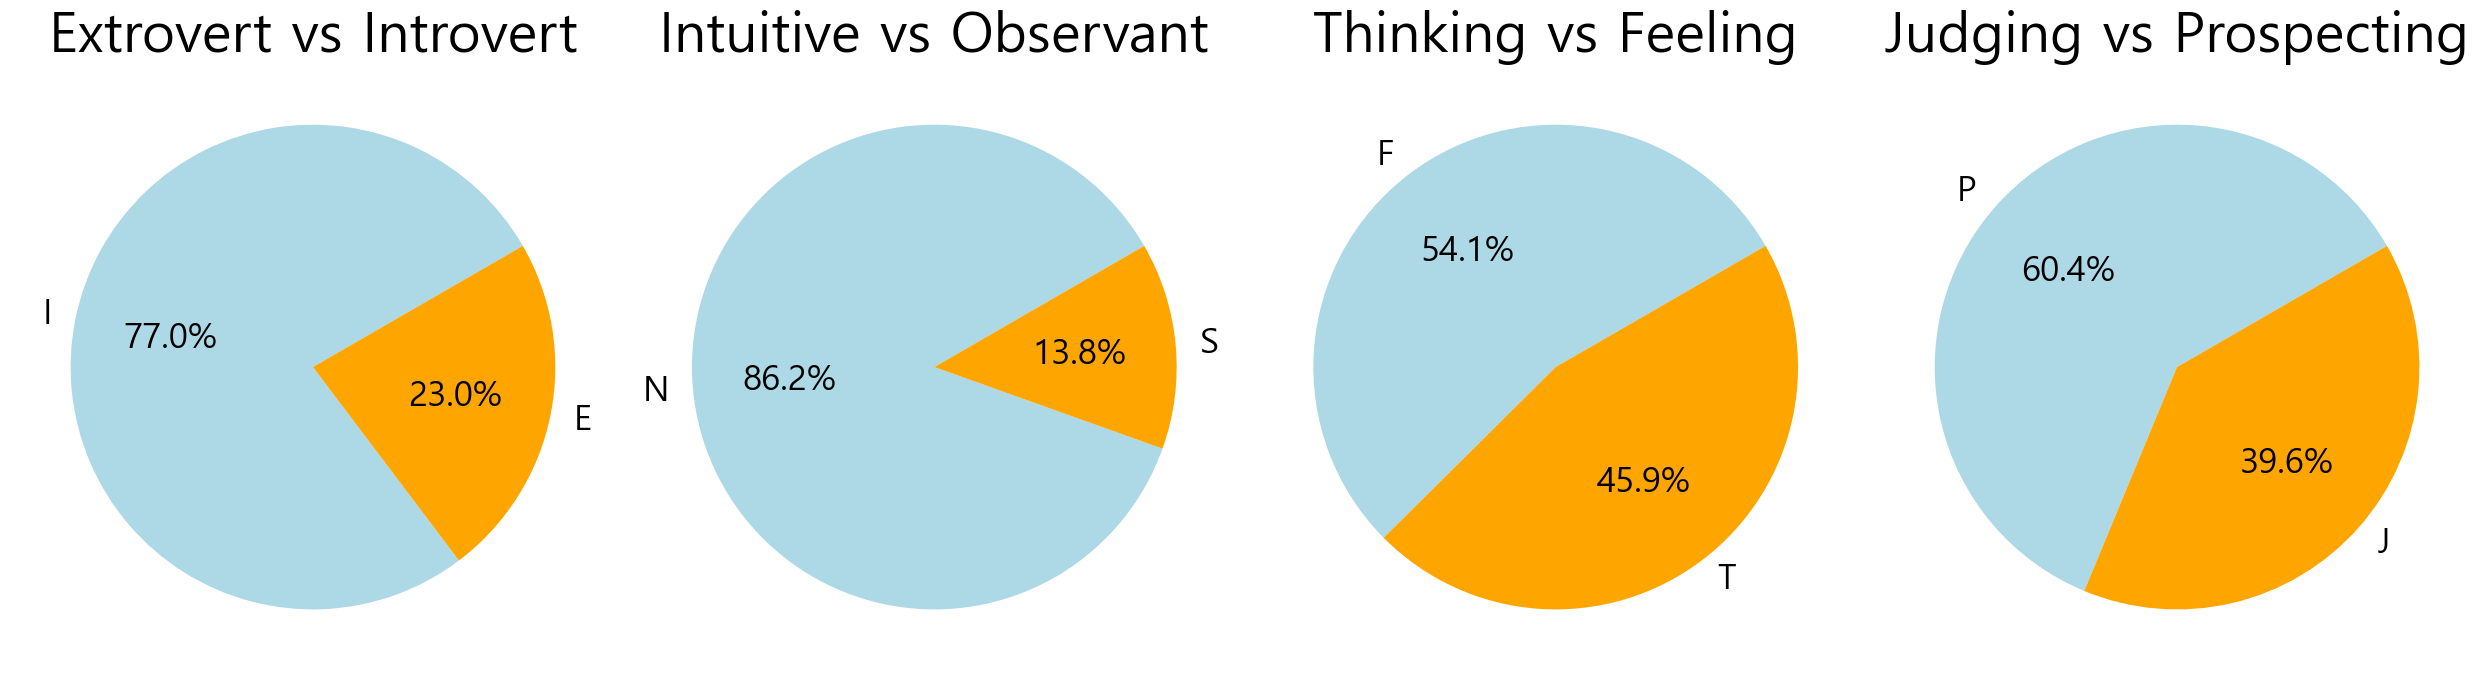

In [8]:
# 타입별 나누기
df['I/E'] = df['type'].str[0]
df['N/S'] = df['type'].str[1]
df['T/F'] = df['type'].str[2]
df['J/P'] = df['type'].str[3]

count_ie = df['I/E'].value_counts()
count_ns = df['N/S'].value_counts()
count_tf = df['T/F'].value_counts()
count_jp = df['J/P'].value_counts()

# 파이차트
fig, axes = plt.subplots(1, 4, figsize=(25, 10))
ax1, ax2, ax3, ax4 = axes.ravel()
textprops = {'fontsize': 25}
colors = ['#ADD8E6', '#FFA500']

ax1.pie(count_ie, labels=count_ie.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax1.set_title('Extrovert vs Introvert', fontsize=40)  

ax2.pie(count_ns, labels=count_ns.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax2.set_title('Intuitive vs Observant', fontsize=40)  

ax3.pie(count_tf, labels=count_tf.index, autopct=lambda p: f'{p:.1f}%', startangle=30, textprops=textprops, colors=colors)
ax3.set_title('Thinking vs Feeling', fontsize=40) 

ax4.pie(count_jp, labels=count_jp.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax4.set_title('Judging vs Prospecting', fontsize=40) 

plt.tight_layout()
plt.show()

#### 단어 구름 시각화

In [9]:
# Top 100 단어 선정   
from collections import Counter 
word = []
for sent in df['posts']:
    for i in sent.split():
        word.append(i)
        
Counter(word).most_common(100)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109),
 ('from', 27001),
 ('one', 26791),
 ("it's", 26386),
 ('out', 25581),
 ('i', 25307),
 ('how', 24557),
 ('some', 24200),
 ('we', 23

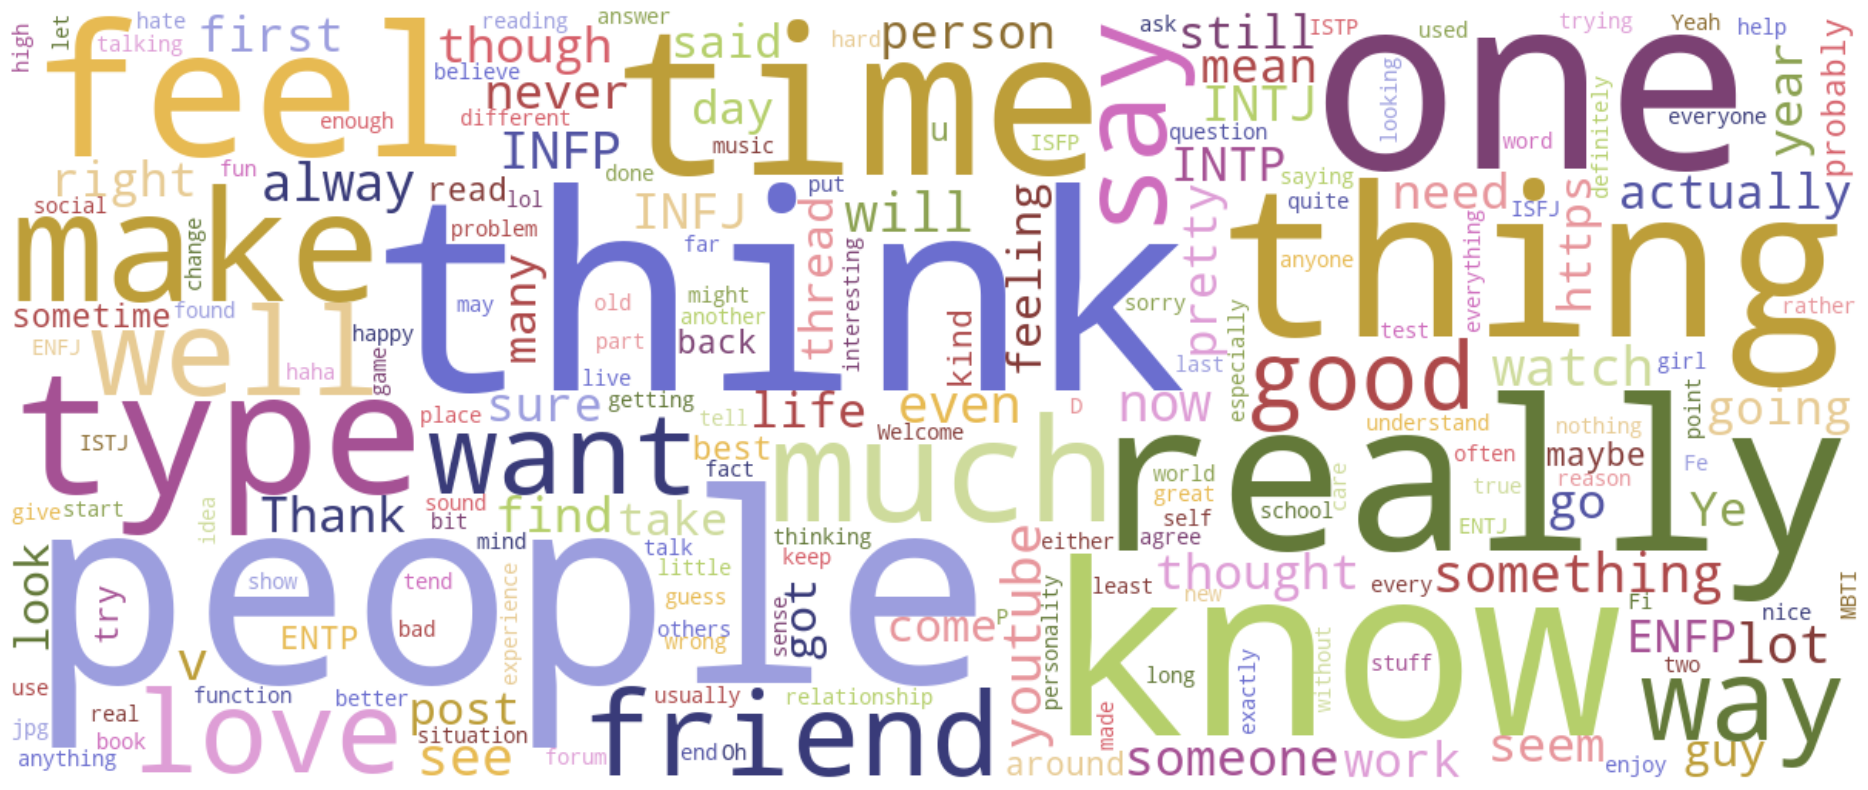

In [10]:
# 전체 post 단어구름 시각화
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(word))

plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_25668\576087971.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[k] = plt.subplot(4, 4, k + 1)


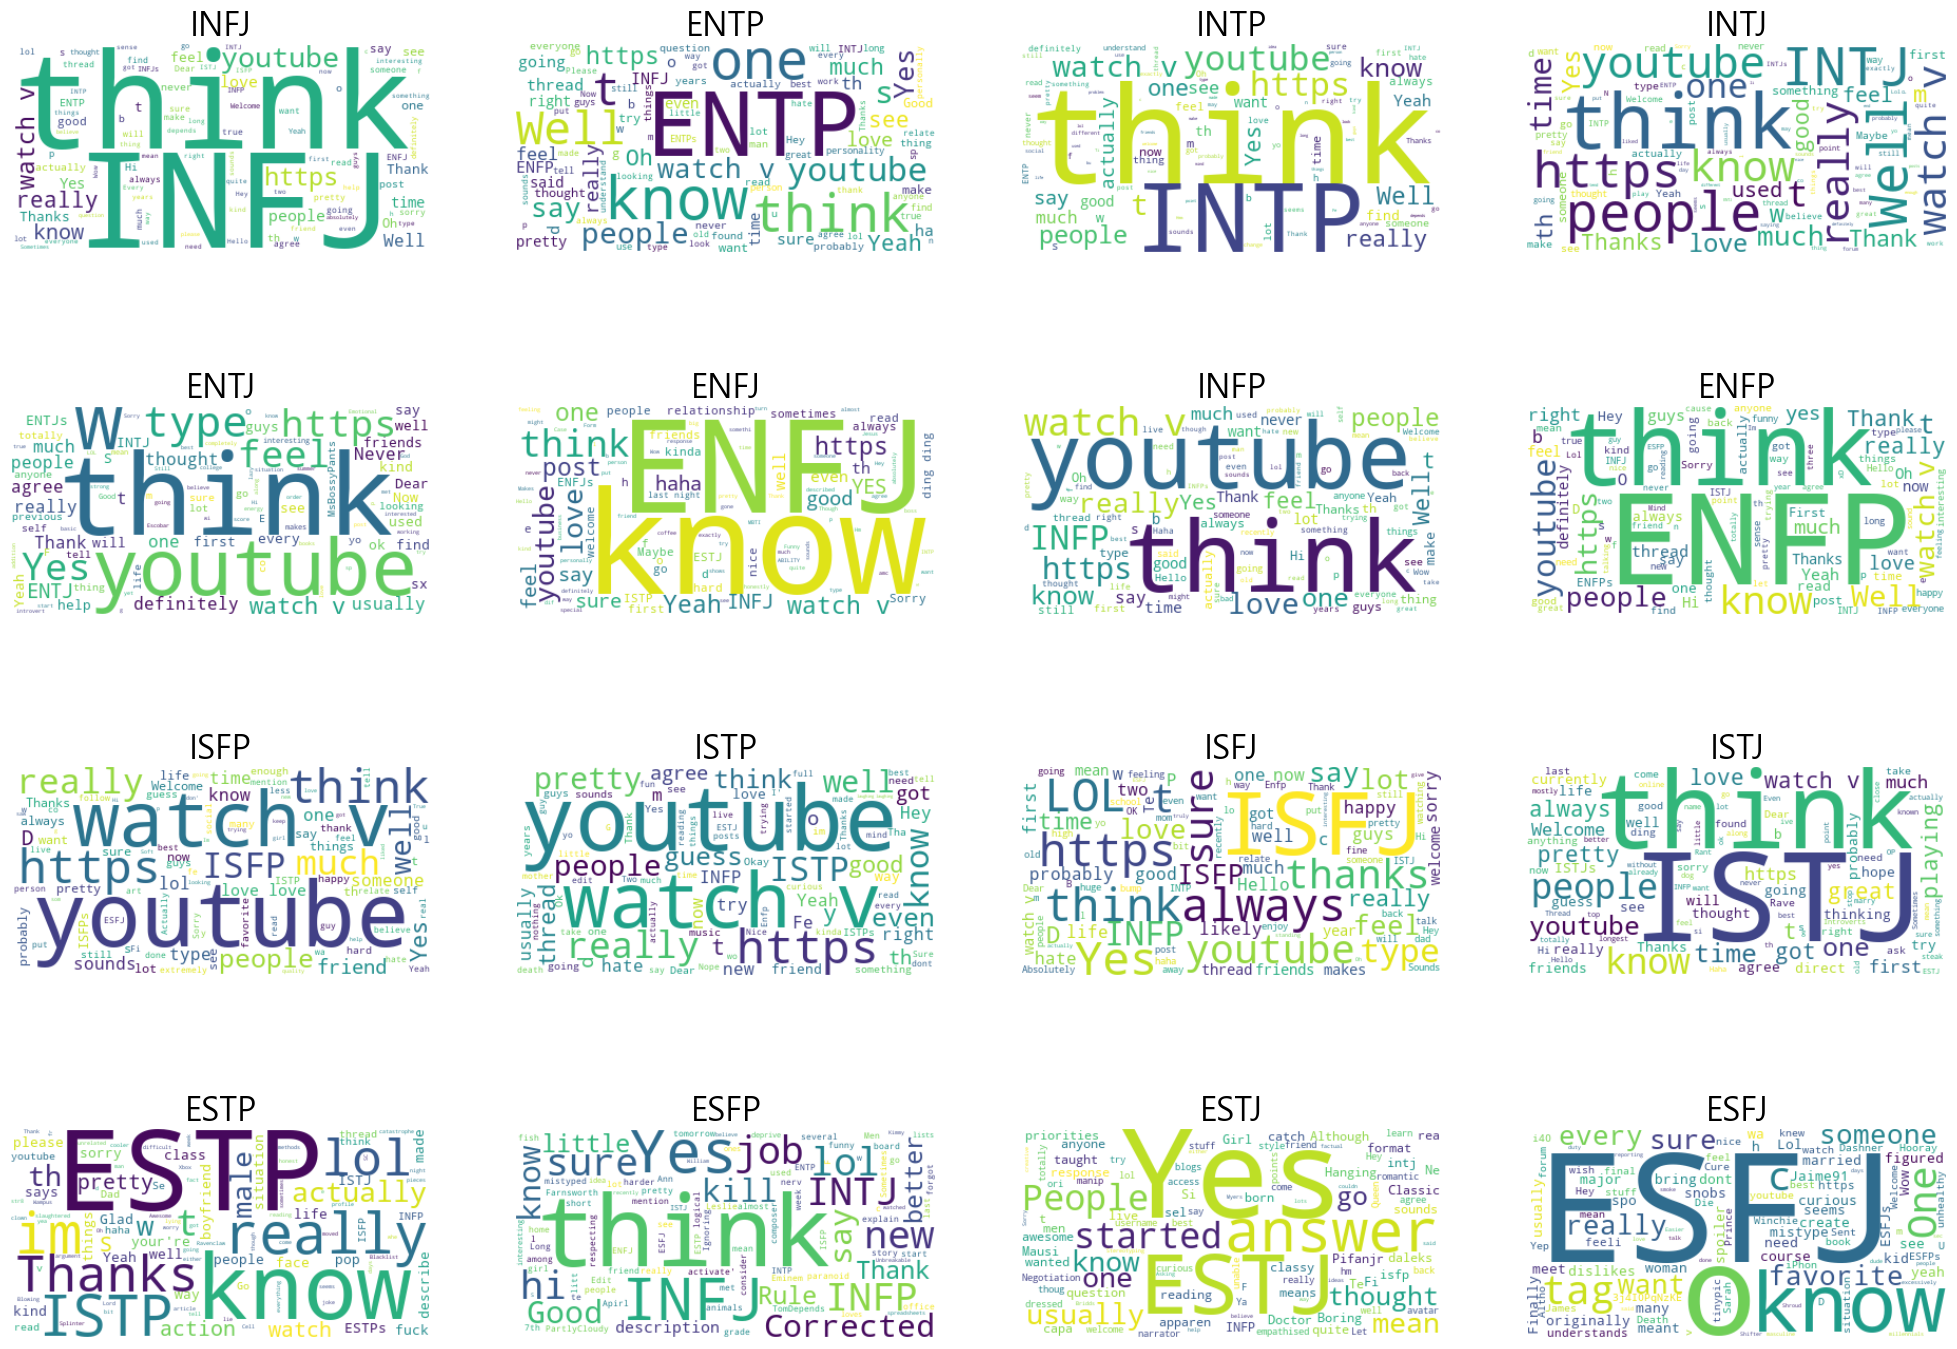

In [11]:
# mbti 타입별 단어구름 시각화
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(25, 18)) 
k = 0
for i in df['type'].unique():    
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(background_color = 'white',max_words=100, relative_scaling=1, normalize_plurals=False).generate(df_4['posts'].to_string())
    ax[k] = plt.subplot(4, 4, k + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i, fontsize=24)
    ax[k].axis("off")
    k += 1

fig.patch.set_facecolor('white')
plt.show()

#### 게시글 전처리

In [12]:
import string
import re
from nltk.corpus import stopwords


def preprocess_text(text):
    # ||| 로 나뉘어 있는 글 나누기
    text = text.replace('|||', ' ')
    
    # url 주소 삭제  
    text = re.sub(r'https?:\/\/.*?[\s+]', ' ', text)
    
    # 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
    text = re.sub(r'\W*\b\w{1,2}\b', '', text)
    
    # 영어가 아닌 문자 공백으로 대체
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # 영문소문자 변경
    text = text.lower()
    
    # Remove punctuation : 특수문자 제거
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    
    # mbti 이름 제거
    mbti_types = ["enfj", "enfp", "entj", "entp", "esfj", "esfp", "estj", "estp",
                  "infj", "infp", "intj", "intp", "isfj", "isfp", "istj", "istp"]  
    for mbti_type in mbti_types:
        text = text.replace(mbti_type, ' ')
    
    # 공백 제거
    text = ' '.join(text.split())
    
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

In [13]:
# 전처리 적용
df['posts'] = df['posts'].apply(preprocess_text)

In [14]:
# 텍스트 데이터 수치로 변경
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

cvect = CountVectorizer()
dtm = cvect.fit_transform(df["posts"])

DTM_array = dtm.toarray()
DTM_array.shape # (8675, 97342)

(8675, 97094)

In [15]:
# 타겟 labelencoder
label_encoder = LabelEncoder()
target = df['type']
target = label_encoder.fit_transform(target)

#### 모델 훈련

In [21]:
# train/test split : 훈련셋(70) vs 테스트셋(30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    DTM_array, target, test_size=0.3, stratify=target, random_state=42)

print((x_train.shape), (y_train.shape), (x_test.shape), (y_test.shape))

(6072, 97094) (6072,) (2603, 97094) (2603,)


#### Naive Bayes 분류기

In [22]:
from sklearn.naive_bayes import MultinomialNB # nb model
from sklearn.metrics import accuracy_score 

# 학습 모델 만들기 : 훈련셋 이용
nb = MultinomialNB()
nb_model = nb.fit(X= x_train, y = y_train)

In [23]:
# 학습 model 평가 : 테스트셋 이용
y_pred = nb_model.predict(X = x_test)


# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.32039953899346907


#### 로지스틱 회귀

In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


분류정확도 : 0.33384556281213984


#### RandomForest 분류기

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123) # default 적용
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)


분류정확도 : 0.2646945831732616


#### XGBoost 분류기

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

y_pred = xgb_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.3292354975028813
